In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
import seaborn as sns


In [2]:
# Loading the dataset
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
# Selection of columns under consideration
data2=data[['RM','MEDV']]
data2=data2.rename(columns={'RM':'x', 'MEDV':'y'})
data3=data2

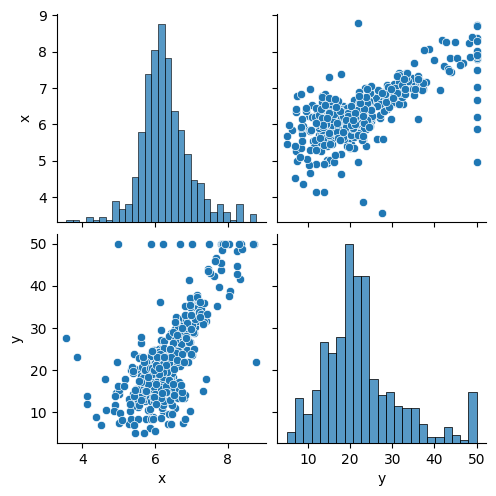

In [4]:
sns.pairplot(data2)

In [5]:
from sklearn.model_selection import train_test_split
# Splitting the data into training and testing sets
x=data2['x']
y=data2['y']
randomvalue= int(input("Enter the random number"))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=randomvalue)


In [6]:
data2=pd.DataFrame({'x':x_train.squeeze(),'y':y_train.squeeze()})
data3=pd.DataFrame({'x':x_test.squeeze(),'y':y_test.squeeze()})
data2.head()

,x,y
79,5.874,20.3
454,6.728,14.9
210,5.960,21.7
497,5.794,18.3
172,5.572,23.1


In [7]:
data3.head()

,x,y
173,6.416,23.6
274,6.758,32.4
491,5.983,13.6
72,6.065,22.8
452,6.297,16.1


<!-- Finding the required values for operation -->

In [8]:
# Table value generation for linear and quadratic regression
data2['x2']=data2['x']*data2['x']
data2['x3']=data2['x']*data2['x2']
data2['x4']=data2['x']*data2['x3']
data2['xy']=data2['x']*data2['y']
data2['x2y']=data2['x2']*data2['y']

In [9]:
# Table of value generation for exponential regression
data2['Y']=data2['y'].apply(np.log)
data2['X']=data2['x'].apply(np.log)
data2['XY']=data2['Y']*data2['X']
data2['X2']=data2['X']*data2['X']
data2['xY']=data2['x']*data2['Y']


In [10]:
# Finding summation value and n value
sumx=data2['x'].sum()
sumx2=data2['x2'].sum()
sumx3=data2['x3'].sum()
sumx4=data2['x4'].sum()
sumy=data2['y'].sum()
sumxy=data2['xy'].sum()
sumx2y=data2['x2y'].sum()
sumX=data2['X'].sum()
sumY=data2['Y'].sum()
sumXY=data2['XY'].sum()
sumX2=data2['X2'].sum()
sumxY=data2['xY'].sum()
n=data2['x'].count()

In [11]:
n

480

In [12]:
data2.head()

,x,y,x2,x3,x4,xy,x2y,Y,X,XY,X2,xY
79,5.874,20.3,34.503876,202.675768,1190.517459,119.2422,700.428683,3.010621,1.770536,5.330412,3.134797,17.684387
454,6.728,14.9,45.265984,304.549540,2049.009307,100.2472,674.463162,2.701361,1.906278,5.149545,3.633896,18.174758
210,5.960,21.7,35.521600,211.708736,1261.784067,129.3320,770.818720,3.077312,1.785070,5.493219,3.186477,18.340781
497,5.794,18.3,33.570436,194.507106,1126.974173,106.0302,614.338979,2.906901,1.756823,5.106910,3.086427,16.842585
172,5.572,23.1,31.047184,172.994909,963.927634,128.7132,717.189950,3.139833,1.717754,5.393460,2.950679,17.495147


In [13]:
print(sumx,sumy,sumx2,sumx3,sumx4,sumxy,sumx2y)

3021.209 10877.5 19254.630757 124264.184025893 812366.1647063529 70605.7156 464989.7780756


In [14]:
# Finding cofficient of the the quadratic function 
A=np.array([[sumx2,sumx,n],[sumx3,sumx2,sumx],[sumx4,sumx3,sumx2]])
B=np.array([sumy,sumxy,sumx2y])

coff=np.linalg.solve(A,B)
coff

array([  2.50184862, -23.24108784,  68.58648391])

In [15]:
# Finding the cofficient of linear function
A2=np.array([[sumx,n],[sumx2,sumx]])
B2=np.array([sumy,sumxy])
coff2=np.linalg.solve(A2,B2)
coff2

array([  8.97268675, -33.81429575])

In [16]:
# Finding the cofficient of linearly transformed power functions
A2=np.array([[n,sumX],[sumX,sumX2]])
B2=np.array([sumY,sumXY])
coff3=np.linalg.solve(A2,B2)
coff3
ap=np.exp(coff3[0])
bp=coff3[1]



In [17]:
# Finding the cofficient of linearly transformed exponential function
A2=np.array([[n,sumx],[sumx,sumx2]])
B2=np.array([sumY,sumxY])
coff4=np.linalg.solve(A2,B2)
coff4
ae=np.exp(coff4[0])
be=np.exp(coff4[1])


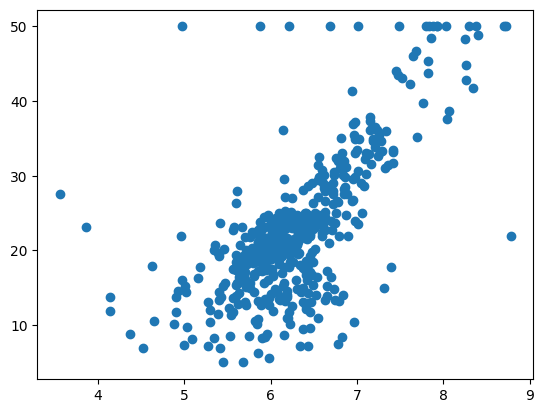

In [18]:
plt.scatter(data['RM'],data['MEDV'])


In [19]:
# Predicted Quadratic Function
def soln(x):
    y=coff[0]*(x**2)+coff[1]*x+coff[2]
    return y



In [20]:
#Predicted Linear Function
def soln2(x):
    y=coff2[0]*x+coff2[1]
    return y

In [21]:
#Predicted Power Function
def soln3(x):
    y=ap*(x**bp)
    return y


In [22]:
#Predicted Exponential Function
def soln4(x):
    y=ae*(be**x)
    return y


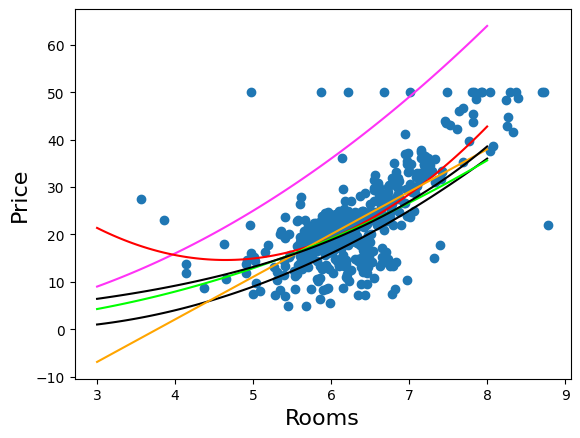

In [23]:

array=np.linspace(3,8,100)
plt.xlabel("Rooms",fontsize=16)
plt.ylabel("Price",fontsize=16)
plt.scatter(data2['x'],data2['y'])
plt.plot(array,np.vectorize(lambda x:((x)**2)/1)(array),'#FF33F6')
plt.plot(array,np.vectorize(lambda x:((x-2)**2)/1)(array),'black')
plt.plot(array,np.vectorize(soln)(array),'red')
plt.plot(array,np.vectorize(soln2)(array),'orange')
plt.plot(array,np.vectorize(soln3)(array),'lime')
plt.plot(array,np.vectorize(soln4)(array),'black')

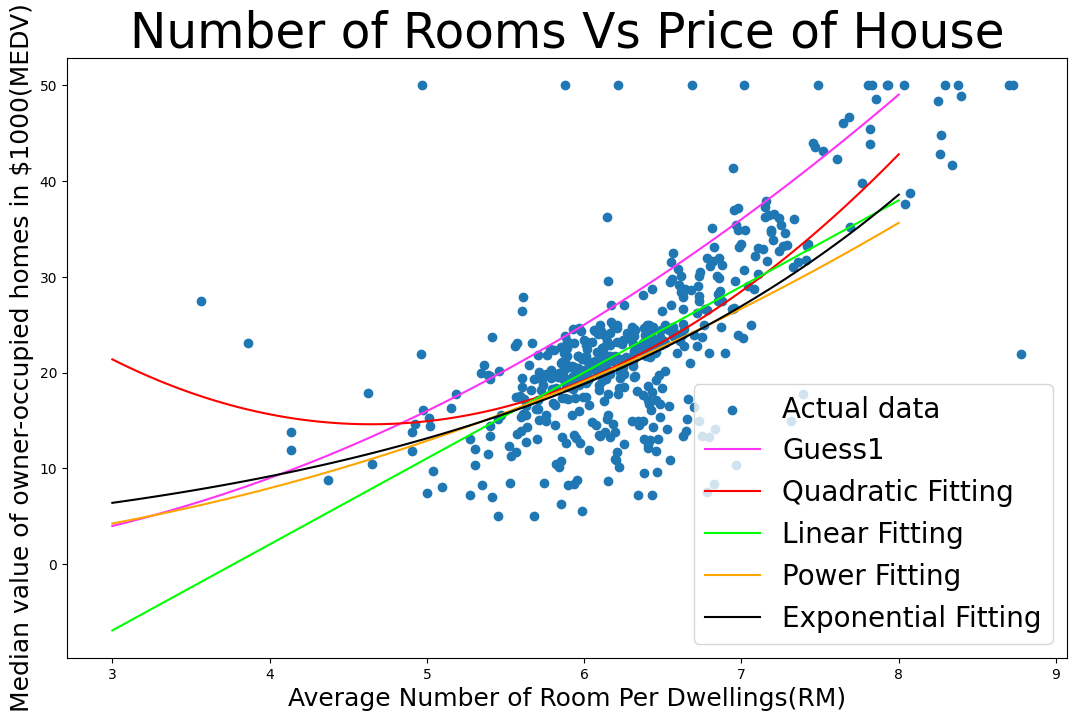

In [24]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_axes([0,0,1,1])
ax.set_xlabel("Average Number of Room Per Dwellings(RM)",fontsize=18)
ax.set_ylabel("Median value of owner-occupied homes in $1000(MEDV)",fontsize=18)
ax.set_title("Number of Rooms Vs Price of House",fontsize=35)
ax.scatter(data2['x'],data2['y'],label="Actual data")
ax.plot(array,np.vectorize(lambda x:((x-1)**2))(array),'#FF33F6',label="Guess1")
ax.plot(array,np.vectorize(soln)(array),'r',label="Quadratic Fitting")
ax.plot(array,np.vectorize(soln2)(array),'lime',label="Linear Fitting")
ax.plot(array,np.vectorize(soln3)(array),'orange',label="Power Fitting")
ax.plot(array,np.vectorize(soln4)(array),'black',label="Exponential Fitting")
ax.legend(loc=4,fontsize=20)

In [25]:
data3['ylin']=data3['x'].apply(soln2)
data3['yquad']=data3['x'].apply(soln)
data3['ypow']=data3['x'].apply(soln3)
data3['yexp']=data3['x'].apply(soln4)
data3['errorlin']=data3['y']-data3['ylin']
data3['errorquad']=data3['y']-data3['yquad']
data3['errorpow']=data3['y']-data3['ypow']
data3['errorexp']=data3['y']-data3['yexp']
data3.head()

,x,y,ylin,yquad,ypow,yexp,errorlin,errorquad,errorpow,errorexp
173,6.416,23.6,23.754462,22.460403,22.095311,21.845421,-0.154462,1.139597,1.504689,1.754579
274,6.758,32.4,26.823121,25.784050,24.724049,24.697312,5.576879,6.615950,7.675951,7.702688
491,5.983,13.6,19.869289,19.091952,18.993951,18.702163,-6.269289,-5.491952,-5.393951,-5.102163
72,6.065,22.8,20.605049,19.657849,19.561937,19.260555,2.194951,3.142151,3.238063,3.539445
452,6.297,16.1,22.686713,21.441178,21.217816,20.932362,-6.586713,-5.341178,-5.117816,-4.832362


In [26]:
ymean=data3['y'].mean()

In [27]:
# Calculating accuracy of linear modeling
rsmelin=np.sqrt(((data3['errorlin']**2).sum())/data3['x'].count())
accuracylin=(1-(rsmelin/ymean))*100
accuracylin=round(accuracylin,4)


In [28]:
# Calculating the accuracy of quadratic modeling
rsmequad=np.sqrt(((data3['errorquad']**2).sum())/data3['x'].count())
accuracyquad=(1-(rsmequad/ymean))*100
accuracyquad=round(accuracyquad,4)

In [29]:
# Calculating the accuracy of power modeling of type (a*x^b)
rsmepow=np.sqrt(((data3['errorpow']**2).sum())/data3['x'].count())
accuracypow=(1-(rsmepow/ymean))*100
accuracypow=round(accuracypow,4)

In [30]:
# Calculating the accuracy of power modeling of type (a*x^b)
rsmeexp=np.sqrt(((data3['errorexp']**2).sum())/data3['x'].count())
accuracyexp=(1-(rsmeexp/ymean))*100
accuracyexp=round(accuracyexp,4)

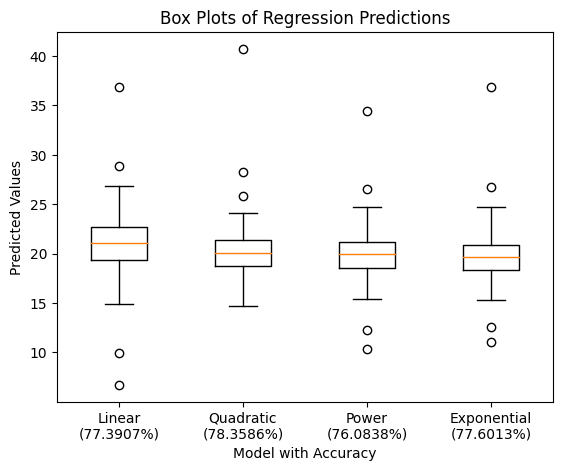

In [31]:
# Combine the predictions into a list
all_predictions = [data3['ylin'], data3['yquad'],data3['ypow'],data3['yexp']]

# Create a figure and axis object
fig, ax = plt.subplots()

# Create the box plot
ax.boxplot(all_predictions)

# Set x-axis tick labels
ax.set_xlabel("Model with Accuracy")
ax.set_xticklabels([f'Linear\n({accuracylin}%)', f'Quadratic\n({accuracyquad}%)', f'Power\n({accuracypow}%)', f'Exponential\n({accuracyexp}%)'])

# Set y-axis label
ax.set_ylabel('Predicted Values')

# Set plot title
ax.set_title('Box Plots of Regression Predictions')

# Show the plot
plt.show()


<!-- Quadratic model is most accurate among all the models tested but is positively skewed. -->

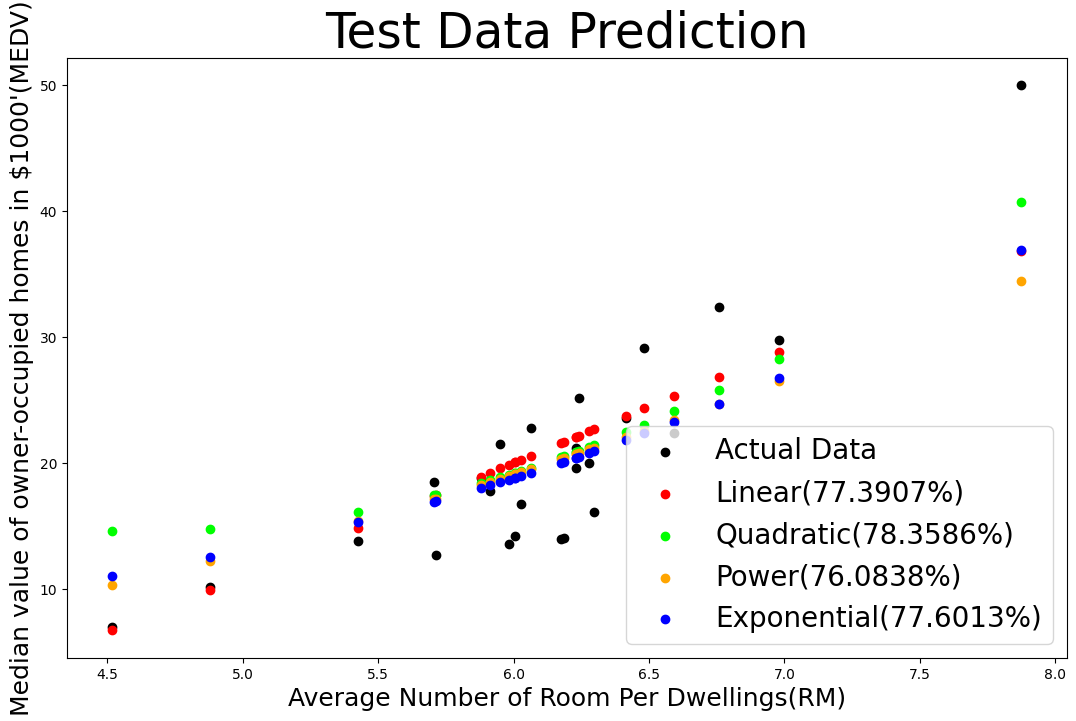

In [32]:
fig=plt.figure(figsize=(10,6))
ax=fig.add_axes([0,0,1,1])
ax.set_xlabel("Average Number of Room Per Dwellings(RM)",fontsize=18)
ax.set_ylabel("Median value of owner-occupied homes in $1000'(MEDV)",fontsize=18)
ax.set_title("Test Data Prediction",fontsize=35)
ax.scatter(data3['x'],data3['y'],color='black',label="Actual Data")
ax.scatter(data3['x'],data3['ylin'],color='red',label=f"Linear({accuracylin}%)")
ax.scatter(data3['x'],data3['yquad'],color="lime",label=f"Quadratic({accuracyquad}%)")
ax.scatter(data3['x'],data3['ypow'],color='orange',label=f"Power({accuracypow}%)")
ax.scatter(data3['x'],data3['yexp'],color='blue',label=f"Exponential({accuracyexp}%)")
ax.legend(loc=4,fontsize=20)
plt.show()

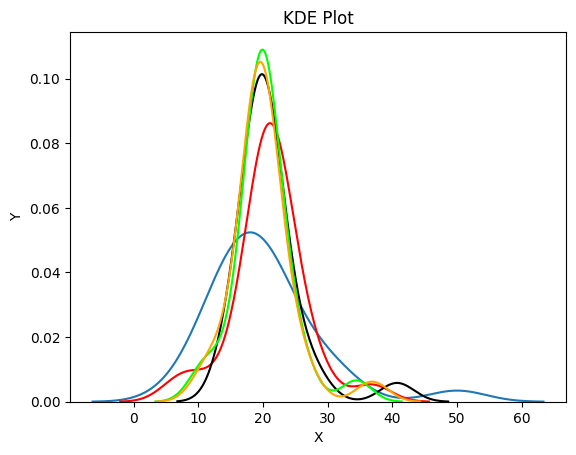

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# KDE plot for actual data
sns.kdeplot(data3['y'])
sns.kdeplot(data3['ylin'],color='red')
sns.kdeplot(data3['yquad'],color='black')
sns.kdeplot(data3['ypow'],color='lime')
sns.kdeplot(data3['yexp'],color='orange')


# Add optional customizations
plt.title("KDE Plot")
plt.xlabel("X")
plt.ylabel("Y")

# Display the plot
plt.show()